In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
 
import warnings
warnings.filterwarnings('ignore')

In [2]:
tracks = pd.read_csv('genres_v2.csv')
tracks.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


## EDA

In [3]:
tracks.shape

(42305, 22)

In [4]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [5]:
tracks.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [6]:
tracks['song_name'].fillna('Unknown', inplace=True)

In [7]:
most_frequent_song_name = tracks['song_name'].mode()[0]
tracks['song_name'].fillna(most_frequent_song_name, inplace=True)

In [8]:
tracks.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name               0
Unnamed: 0          21525
title               21525
dtype: int64

In [9]:
tracks.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
genre                object
song_name            object
Unnamed: 0          float64
title                object
dtype: object

In [10]:
tracks['danceability'].nunique()

890

In [11]:
tracks['energy'].nunique()

917

In [12]:
tracks['speechiness'].nunique()

1447

In [13]:
tracks['acousticness'].nunique()

4602

In [14]:
tracks['instrumentalness'].nunique()

4757

In [15]:
tracks['liveness'].nunique()

1695

In [16]:
tracks['valence'].nunique()

1674

In [17]:
tracks['uri'].nunique()

35877

In [18]:
tracks['track_href'].nunique()

35877

In [19]:
tracks['analysis_url'].nunique()

35877

In [20]:
tracks['duration_ms'].nunique()

26261

In [21]:
tracks['genre'].nunique()

15

In [22]:
tracks['song_name'].nunique()

15440

In [23]:
tracks.duplicated().sum()

0

In [24]:
tracks.drop_duplicates(inplace=True)

In [25]:
tracks

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,Unknown,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,Unknown,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,Unknown,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,Unknown,20998.0,Euphoric Hardstyle


In [26]:
tracks['type'].nunique()

1

In [27]:
tracks['popularity'] = (tracks['danceability'] * 0.4) + (tracks['energy'] * 0.3) + (tracks['valence'] * 0.3)

In [28]:
tracks = tracks.drop(columns=['title'],axis=1)

In [29]:
tracks = tracks.drop(columns=['Unnamed: 0'],axis=1)

In [30]:
tracks = tracks.drop(columns=['uri'])

In [31]:
tracks = tracks.drop(columns=['analysis_url'],axis=1)

In [32]:
tracks = tracks.drop(columns=['type'],axis=1)

In [33]:
#tracks = tracks.drop(columns=['duration_ms'],axis=1)

In [34]:
tracks = tracks.drop(columns=['time_signature'],axis=1)

In [35]:
tracks = tracks.drop(columns=['id'],axis=1)

In [36]:
tracks = tracks.drop(columns=['track_href'],axis=1)

In [37]:
tracks.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
genre                object
song_name            object
popularity          float64
dtype: object

In [38]:
tracks.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
song_name           0
popularity          0
dtype: int64

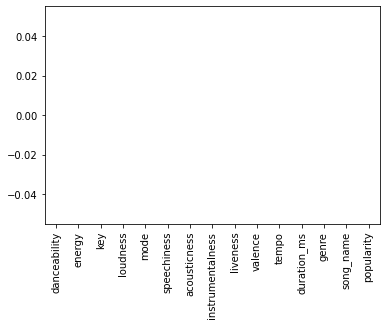

In [39]:
tracks.dropna(inplace = True)
tracks.isnull().sum().plot.bar()
plt.show()

In [40]:
tracks.shape

(42305, 15)

In [41]:
#tracks.dtypes

In [42]:
tracks.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre,song_name,popularity
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,Dark Trap,Mercury: Retrograde,0.69330
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,Dark Trap,Pathology,0.47270
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,Dark Trap,Symbiote,0.61963
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),0.47720
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,Dark Trap,Venom,0.68370


In [43]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame and 'genre' is the column you want to encode
label_encoder = LabelEncoder()
tracks['genre_encoded'] = label_encoder.fit_transform(tracks['genre'])

In [44]:
label_encoder = LabelEncoder()
tracks['song_name'] = label_encoder.fit_transform(tracks['song_name'])

In [45]:
#label_encoder = LabelEncoder()
#tracks['id'] = label_encoder.fit_transform(tracks['id'])

In [46]:
tracks.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
genre                object
song_name             int32
popularity          float64
genre_encoded         int32
dtype: object

In [47]:
tracks.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre,song_name,popularity,genre_encoded
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,Dark Trap,8346,0.69330,0
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,Dark Trap,9892,0.47270,0
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,Dark Trap,12447,0.61963,0
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,Dark Trap,10228,0.47720,0
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,Dark Trap,13872,0.68370,0


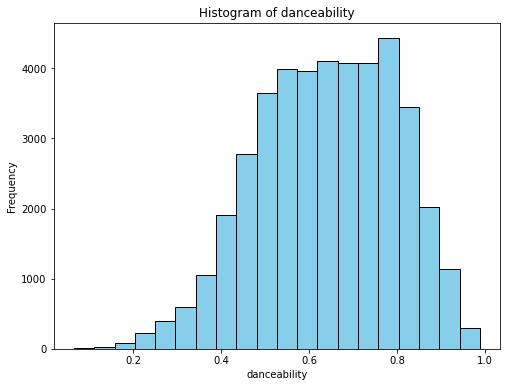

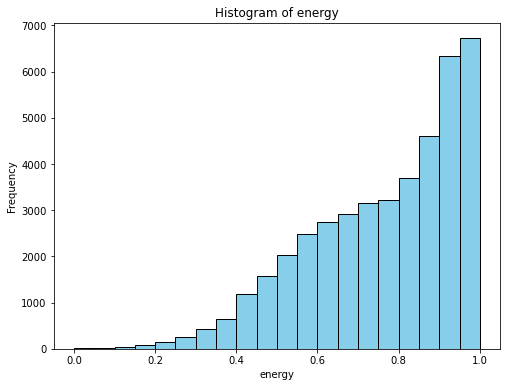

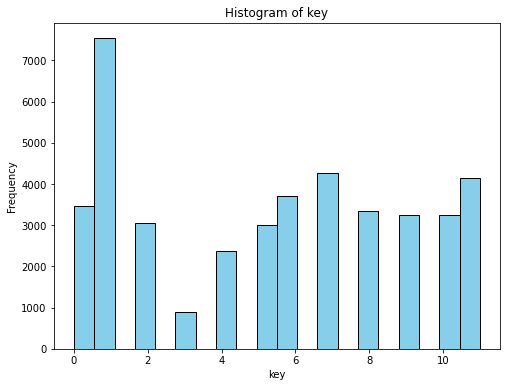

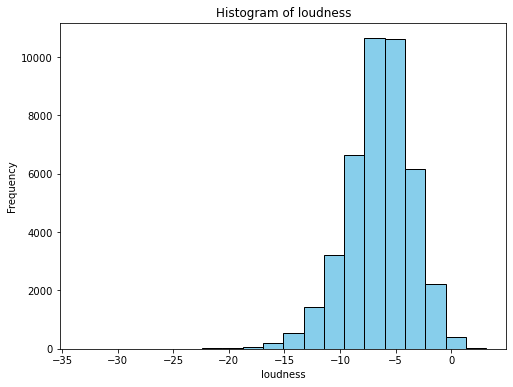

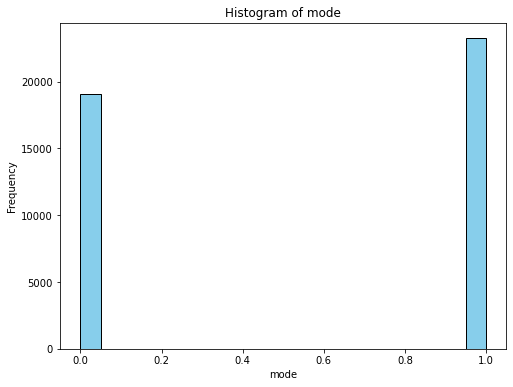

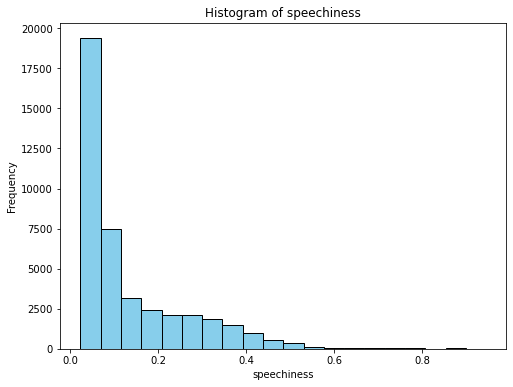

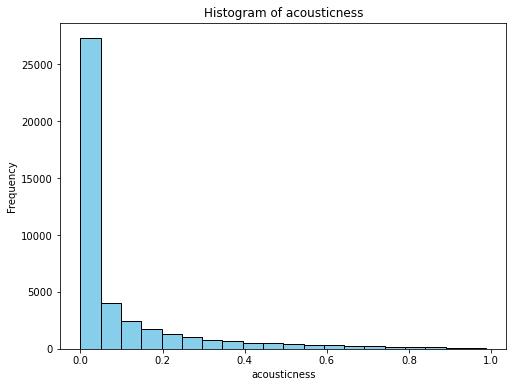

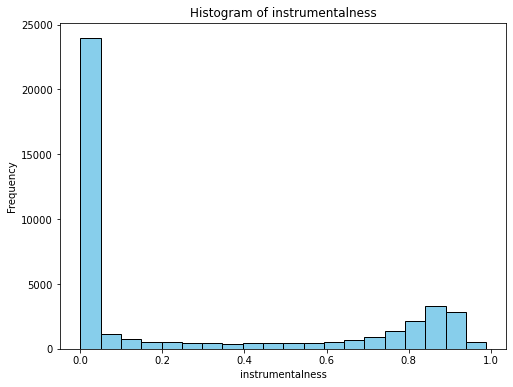

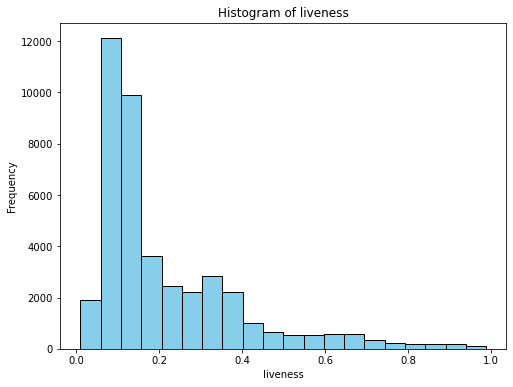

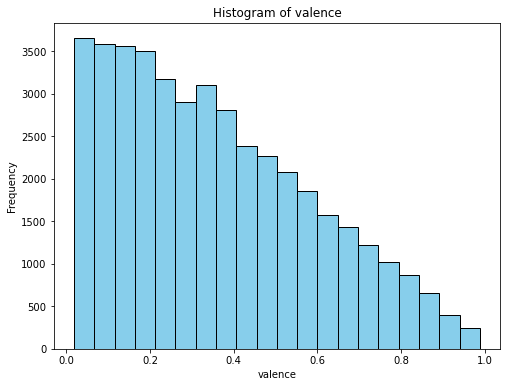

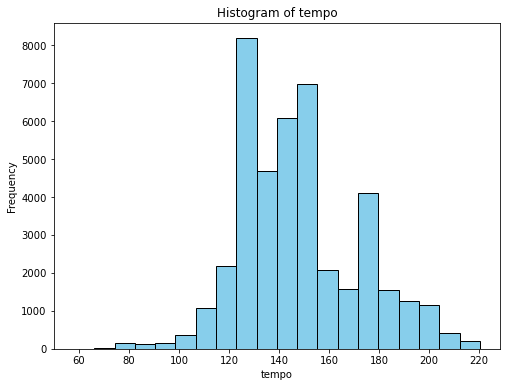

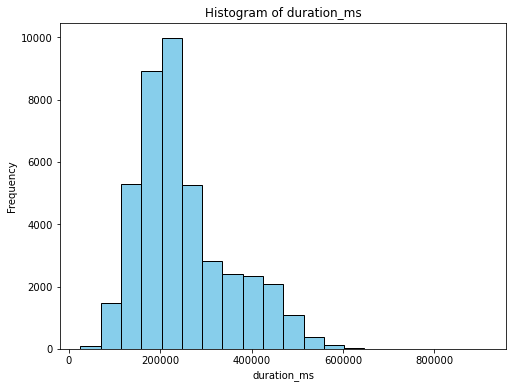

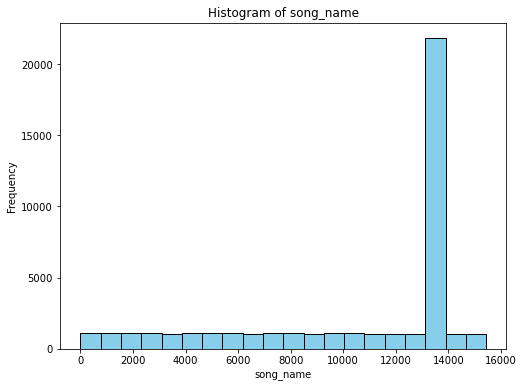

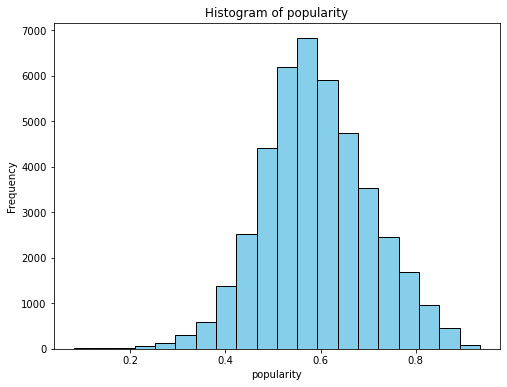

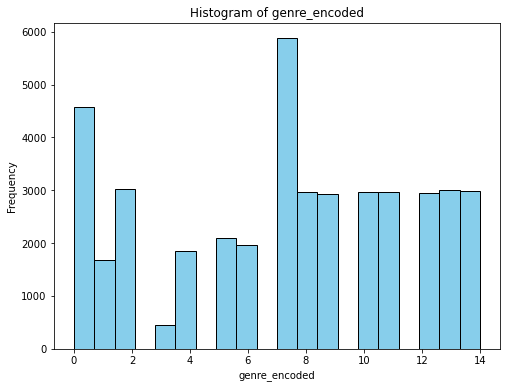

In [48]:
numerical_cols = tracks.select_dtypes(include=['float64', 'int32','int64']).columns

# Plot histograms for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    plt.hist(tracks[col], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

In [49]:
import seaborn as sns

In [50]:
#numerical_vars = tracks.select_dtypes(include=['float64', 'int64'])

# Plot pair plot
#sns.pairplot(numerical_vars)
#plt.show()

In [51]:
#sns.pairplot(tracks)

In [52]:
#corr_matrix = tracks.corr()

## Feature Selection

In [53]:
sampled_data = tracks.sample(frac=0.3, random_state=42)

# Display the sampled dataset
print(sampled_data.head())

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
7625          0.859   0.792    2    -4.007     1       0.1410      0.065000   
10059         0.829   0.619    1    -7.258     1       0.1980      0.290000   
8322          0.461   0.834    3    -3.387     0       0.1420      0.261000   
22036         0.691   0.984    1    -4.828     1       0.0610      0.000924   
12324         0.685   0.798    6    -4.683     0       0.0342      0.013100   

       instrumentalness  liveness  valence    tempo  duration_ms  \
7625           0.000000    0.3000    0.766  206.402       276813   
10059          0.000371    0.0975    0.351  192.070       148093   
8322           0.000000    0.0918    0.517  129.976       193542   
22036          0.513000    0.5960    0.756  126.979       204091   
12324          0.000078    0.1110    0.831  133.994       193647   

                 genre  song_name  popularity  genre_encoded  
7625   Underground Rap        711      0.8110        

In [54]:
sampled_data = tracks.sample(frac=0.3, random_state=42)

# Select only numerical columns for computing the correlation matrix
numerical_data = sampled_data.select_dtypes(include=['float64', 'int64','int32'])

# Calculate the correlation matrix for the sampled dataset
corr_matrix = numerical_data.corr()

In [55]:
print(corr_matrix)

                  danceability    energy       key  loudness      mode  \
danceability          1.000000 -0.330317 -0.012886 -0.220109  0.088436   
energy               -0.330317  1.000000  0.037443  0.606572 -0.032095   
key                  -0.012886  0.037443  1.000000 -0.000655 -0.254184   
loudness             -0.220109  0.606572 -0.000655  1.000000 -0.003430   
mode                  0.088436 -0.032095 -0.254184 -0.003430  1.000000   
speechiness           0.186134 -0.152352 -0.033019  0.051441  0.048381   
acousticness          0.079962 -0.505407  0.000196 -0.287603 -0.023087   
instrumentalness     -0.067975  0.295049  0.060199 -0.202535 -0.016856   
liveness             -0.205603  0.243949  0.003020  0.172477  0.005036   
valence               0.368669 -0.009557  0.029901  0.093395  0.030914   
tempo                -0.153281 -0.031648 -0.007041  0.150091 -0.020010   
duration_ms          -0.057434  0.297644  0.067809 -0.092155 -0.025392   
song_name            -0.172195  0.3905

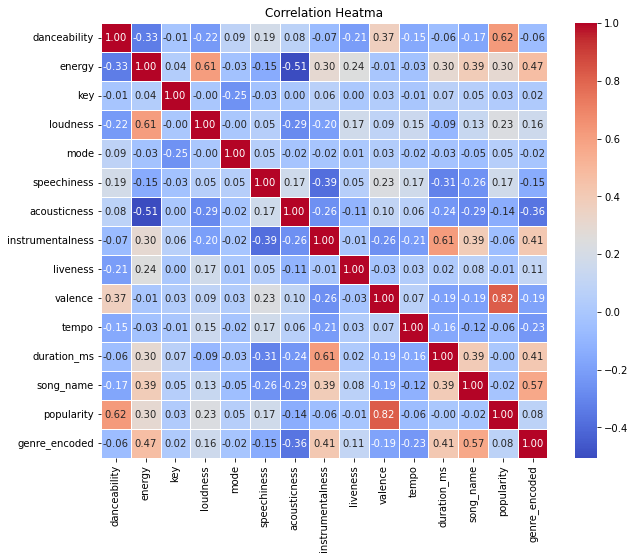

In [56]:
import seaborn as sns

plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatma')
plt.show()

In [57]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'tracks' is your DataFrame containing the columns you want to compare

# Select the columns you want to compare
columns_to_compare = ['danceability','energy','key','loudness','speechiness','instrumentalness','liveness','valence','tempo','genre_encoded','song_name']  # Replace with the actual column names

# Extract the data for the selected columns
data_to_compare = tracks[columns_to_compare]

# Calculate cosine similarity between columns
cosine_similarities = cosine_similarity(data_to_compare.T)  # Transpose the DataFrame to compare columns instead of rows

# Print cosine similarities
print("Cosine Similarities:")
print(cosine_similarities)

Cosine Similarities:
[[ 1.          0.92621083  0.80047904 -0.90546261  0.74282836  0.57666378
   0.7213363   0.86135207  0.95253138  0.82672778  0.88324094]
 [ 0.92621083  1.          0.80880931 -0.82652097  0.69045628  0.64648851
   0.78612562  0.81223221  0.95877061  0.89068708  0.93427446]
 [ 0.80047904  0.80880931  1.         -0.75336088  0.59490834  0.53173339
   0.63958403  0.70032827  0.81442408  0.71639871  0.77326322]
 [-0.90546261 -0.82652097 -0.75336088  1.         -0.65508378 -0.61417305
  -0.65993888 -0.74381265 -0.88855533 -0.74659475 -0.82018571]
 [ 0.74282836  0.69045628  0.59490834 -0.65508378  1.          0.23716763
   0.59264797  0.69618404  0.74292681  0.57962897  0.61489424]
 [ 0.57666378  0.64648851  0.53173339 -0.61417305  0.23716763  1.
   0.46111255  0.39632168  0.57265409  0.68981311  0.68034051]
 [ 0.7213363   0.78612562  0.63958403 -0.65993888  0.59264797  0.46111255
   1.          0.63867904  0.7661715   0.6983679   0.7325028 ]
 [ 0.86135207  0.81223221  0

In [58]:
# Create a DataFrame to display similarities
similarities_df = pd.DataFrame(cosine_similarities, index=columns_to_compare, columns=columns_to_compare)

# Set the diagonal elements to NaN (since each column is identical to itself)
np.fill_diagonal(similarities_df.values, np.nan)

# Find the maximum similarity value and its corresponding indices
max_similarity = similarities_df.max().max()
max_similarity_indices = np.where(similarities_df.values == max_similarity)

# Extract the column names corresponding to the maximum similarity
most_similar_column_1 = similarities_df.index[max_similarity_indices[0][0]]
most_similar_column_2 = similarities_df.columns[max_similarity_indices[1][0]]

# Print the most similar columns and their similarity score
print(f"The most similar columns are '{most_similar_column_1}' and '{most_similar_column_2}' with a similarity score of {max_similarity:.2f}.")

The most similar columns are 'energy' and 'tempo' with a similarity score of 0.96.


In [59]:
# Create a DataFrame to display similarities
similarities_df = pd.DataFrame(cosine_similarities, index=columns_to_compare, columns=columns_to_compare)

# Set the diagonal elements to NaN (since each column is identical to itself)
np.fill_diagonal(similarities_df.values, np.nan)

# Find the maximum similarity value and its corresponding indices
max_similarity_mask = similarities_df > 0.90  # Threshold for similarity score
max_similarity_indices = np.where(max_similarity_mask)

# Extract the column pairs with similarity score greater than 0.80
similar_pairs = [(similarities_df.index[i], similarities_df.columns[j]) for i, j in zip(*max_similarity_indices)]

# Print the most similar columns and their similarity score
for pair in similar_pairs:
    column1, column2 = pair
    similarity_score = similarities_df.loc[column1, column2]
    print(f"Columns '{column1}' and '{column2}' have a similarity score of {similarity_score:.2f}.")

Columns 'danceability' and 'energy' have a similarity score of 0.93.
Columns 'danceability' and 'tempo' have a similarity score of 0.95.
Columns 'energy' and 'danceability' have a similarity score of 0.93.
Columns 'energy' and 'tempo' have a similarity score of 0.96.
Columns 'energy' and 'song_name' have a similarity score of 0.93.
Columns 'tempo' and 'danceability' have a similarity score of 0.95.
Columns 'tempo' and 'energy' have a similarity score of 0.96.
Columns 'tempo' and 'song_name' have a similarity score of 0.91.
Columns 'genre_encoded' and 'song_name' have a similarity score of 0.91.
Columns 'song_name' and 'energy' have a similarity score of 0.93.
Columns 'song_name' and 'tempo' have a similarity score of 0.91.
Columns 'song_name' and 'genre_encoded' have a similarity score of 0.91.


In [60]:
tracks.shape

(42305, 16)

In [61]:
# Select the specific columns for which you want to find correlations
selected_columns = ['danceability', 'energy', 'instrumentalness','tempo','genre_encoded','song_name']

# Compute the correlation matrix
correlation_matrix = tracks[selected_columns].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                  danceability    energy  instrumentalness     tempo  \
danceability          1.000000 -0.323248         -0.067114 -0.165929   
energy               -0.323248  1.000000          0.303875 -0.024504   
instrumentalness     -0.067114  0.303875          1.000000 -0.207667   
tempo                -0.165929 -0.024504         -0.207667  1.000000   
genre_encoded        -0.052687  0.471327          0.414434 -0.231731   
song_name            -0.164693  0.395869          0.394088 -0.111119   

                  genre_encoded  song_name  
danceability          -0.052687  -0.164693  
energy                 0.471327   0.395869  
instrumentalness       0.414434   0.394088  
tempo                 -0.231731  -0.111119  
genre_encoded          1.000000   0.573266  
song_name              0.573266   1.000000  


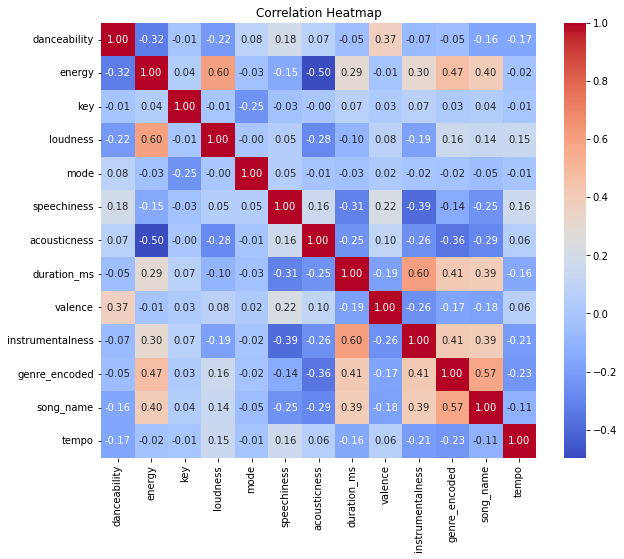

In [62]:
# Select the specific numeric columns for which you want to find correlations
numeric_columns = ['danceability', 'energy', 'key','loudness','mode','speechiness','acousticness','duration_ms','valence', 'instrumentalness','genre_encoded','song_name','tempo']

# Compute the correlation matrix
correlation_matrix = tracks[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

In [63]:
tracks.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
genre                object
song_name             int32
popularity          float64
genre_encoded         int32
dtype: object

## Model Building

In [64]:
'''model = TSNE(n_components = 2, random_state = 0)
tsne_data = model.fit_transform(tracks.head(500))
plt.figure(figsize = (7, 7))
plt.scatter(tsne_data[:,0], tsne_data[:,1])
plt.show()'''

'model = TSNE(n_components = 2, random_state = 0)\ntsne_data = model.fit_transform(tracks.head(500))\nplt.figure(figsize = (7, 7))\nplt.scatter(tsne_data[:,0], tsne_data[:,1])\nplt.show()'

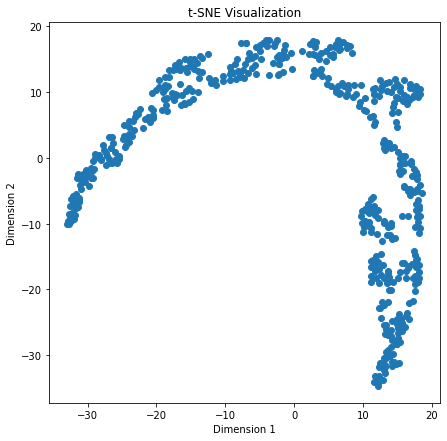

In [65]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'tracks' is your DataFrame containing the data for t-SNE

# Selecting only numeric columns
numeric_tracks = tracks.select_dtypes(include=['float64', 'int64','int32'])

# Define the model and transform the data
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(numeric_tracks.head(500))  # Taking only the first 500 rows for visualization

# Plot the 2D points
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

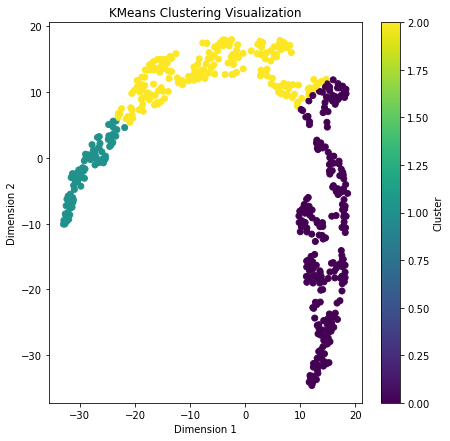

In [66]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'tracks' is your DataFrame containing the data for clustering

# Define the number of clusters
n_clusters = 3  # Adjust as needed

# Select only numeric columns for KMeans
numeric_columns = tracks.select_dtypes(include=['float64', 'int64','int32']).columns

# Exclude non-numeric columns and apply KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(tracks[numeric_columns].head(500))  # Taking only the first 500 rows for clustering

# Get cluster labels for the first 500 rows
cluster_labels = kmeans.labels_

# Plot the clusters in 2D space
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('KMeans Clustering Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

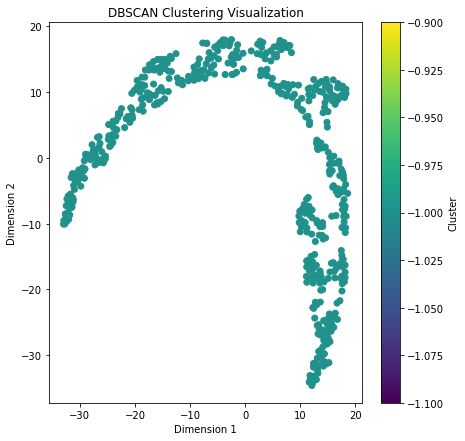

In [71]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Assuming 'tracks' is your DataFrame containing the data for clustering

# Define DBSCAN parameters
eps = 0.5  # The maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples = 5  # The number of samples (or total weight) in a neighborhood for a point to be considered as a core point

# Select only numeric columns for DBSCAN
numeric_columns = tracks.select_dtypes(include=['float64', 'int64','int32']).columns

# Exclude non-numeric columns and apply DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(tracks[numeric_columns].head(500))  # Taking only the first 500 rows for clustering

# Get cluster labels for the first 500 rows
cluster_labels = dbscan.labels_

# Plot the clusters in 2D space
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

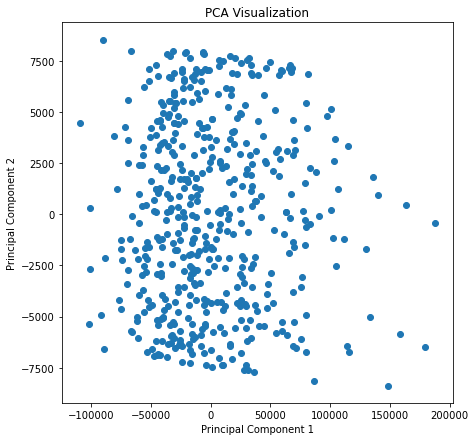

In [68]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'tracks' is your DataFrame containing the data for PCA

# Define the number of components for PCA
n_components = 3  # Number of components to keep

# Select only numeric columns for PCA
numeric_columns = tracks.select_dtypes(include=['float64', 'int64','int32']).columns

# Exclude non-numeric columns and apply PCA
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(tracks[numeric_columns].head(500))  # Taking only the first 500 rows for PCA

# Plot the data in 2D space
plt.figure(figsize=(7, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [69]:
# Assuming 'tracks' is your DataFrame containing song data with genre information

def recommend_songs_by_genre(genres, tracks):
    recommended_tracks = tracks[tracks['genre'].isin(genres)]
    return recommended_tracks.sample(10)  # Return a random sample of 10 songs from the selected genres

# Example usage:
selected_genres = ['Rock', 'Pop']
recommended_tracks = recommend_songs_by_genre(selected_genres, tracks)
print(recommended_tracks)

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
18273         0.691   0.795    1    -4.021     0       0.0355      0.000812   
18377         0.671   0.710    9    -6.997     0       0.1090      0.335000   
18349         0.747   0.937    0    -5.746     1       0.0453      0.020800   
18337         0.807   0.887    9    -3.726     1       0.0503      0.057300   
18078         0.452   0.574    6    -8.336     1       0.3100      0.246000   
18254         0.710   0.851    7    -4.241     1       0.3180      0.112000   
18348         0.624   0.876    9    -3.374     1       0.1000      0.073500   
18274         0.703   0.733    7    -3.598     1       0.0852      0.111000   
18424         0.667   0.719    7    -5.371     0       0.0346      0.002850   
18056         0.722   0.758   11    -4.477     0       0.0471      0.011100   

       instrumentalness  liveness  valence    tempo  duration_ms genre  \
18273          0.000001    0.1560    0.876  133.971     

In [70]:
print(tracks.columns)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'genre', 'song_name', 'popularity', 'genre_encoded'],
      dtype='object')
